In [1]:
import os
import pickle

import numpy as np
import torch

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot

from data_loaders.pulja_data_loader import PuljaDataLoader
from models._20220530_00 import UserModel
from models.utils import collate_fn

if torch.cuda.is_available():
    from torch.cuda import FloatTensor, LongTensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    from torch import FloatTensor, LongTensor

In [2]:
ckpt_path = "ckpts"
if not os.path.isdir(ckpt_path):
    os.mkdir(ckpt_path)

batch_size = 256
num_epochs = 100
train_ratio = 0.9

seq_len = 100

dim_v = 20

dataset = PuljaDataLoader(seq_len)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

model = UserModel(dataset.num_c, dataset.num_d, dim_v).to(device)

train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(
    dataset, [train_size, test_size]
)

if os.path.exists(os.path.join(dataset.dataset_dir, "indices.pkl")):
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "rb") as f:
        indices = pickle.load(f)
    train_dataset.indices = indices[0]
    test_dataset.indices = indices[1]
else:
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "wb") as f:
        pickle.dump((train_dataset.indices, test_dataset.indices), f)


In [3]:
model.load_state_dict(
    torch.load(
        os.path.join(
            os.path.join(
                ckpt_path, "_20220530_00"
            ),
            "model_fin.ckpt"
        ),
        map_location=device
    )
)
model.eval()

UserModel(
  (D): Embedding(7, 1)
  (gru): GRU(40, 20, batch_first=True)
  (linear_1): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
  (linear_2): Sequential(
    (0): Linear(in_features=60, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
)

In [4]:
start_seq = 125041
# end_seq = 246367
end_seq = 228480

In [5]:
df_u = dataset.df[dataset.df["userSeq"] == 3613]
df_u = df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= end_seq)]

In [6]:
df_u

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5
124950,125041,207584,3613,13095,④,Y,394,2022-01-17 22:08:51,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
124955,125046,207584,3613,3,③,Y,125,2022-01-17 22:10:59,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
124964,125055,207584,3613,13259,⑤,Y,184,2022-01-17 22:14:04,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
124969,125060,207584,3613,13258,③,Y,89,2022-01-17 22:15:35,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
124976,125067,207584,3613,13254,⑤,Y,108,2022-01-17 22:17:25,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228377,228476,348224,3613,27154,13,Y,23,2022-04-30 23:12:50,2.0,2 방정식과 부등식,06 이차방정식과 이차함수,"02 이차함수의 최대, 최소",[8] 제한된 범위에서의 이차함수의 최대 · 최소,[유형 08 1] 제한된 범위에서의 이차함수의 최대 · 최소
228378,228477,348224,3613,27163,25,Y,76,2022-04-30 23:14:08,3.0,2 방정식과 부등식,06 이차방정식과 이차함수,"02 이차함수의 최대, 최소",[8] 제한된 범위에서의 이차함수의 최대 · 최소,[유형 08 1] 제한된 범위에서의 이차함수의 최대 · 최소
228379,228478,348224,3613,27166,④,Y,46,2022-04-30 23:14:57,3.0,2 방정식과 부등식,06 이차방정식과 이차함수,"02 이차함수의 최대, 최소",[8] 제한된 범위에서의 이차함수의 최대 · 최소,[유형 08 2] 제한된 범위에서 최댓값 또는 최솟값이 주어질 때 미정계수 구하기
228380,228479,348224,3613,27178,⑥,N,110,2022-04-30 23:16:49,3.0,2 방정식과 부등식,06 이차방정식과 이차함수,"02 이차함수의 최대, 최소",[8] 제한된 범위에서의 이차함수의 최대 · 최소,[유형 08 3] 제한된 범위에서의 이차함수의 최대 · 최소-대칭축의 위치를 모를 때


In [7]:
df_u.iloc[22]

seq                                     125178
cunitSeq                                207585
userSeq                                   3613
question_id                              13108
answer                                       ⑥
isCorrect                                    N
duration                                    23
regdate                    2022-01-17 22:56:17
difficulty_cd                              2.0
category1                                1 다항식
category2                           01 다항식의 연산
category3                           01 다항식의 연산
category4                      [1] 다항식의 덧셈과 뺄셈
category5        [유형 01 3] 연립방정식을 이용하여 다항식 구하기
Name: 125087, dtype: object

In [8]:
df_temp = df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= 125178)]

c_seq_temp = np.array(
    [dataset.c2idx[c] for c in df_temp["category2"].values]
)
d_seq_temp = np.array(
    [dataset.d2idx[d] for d in df_temp["difficulty_cd"].values]
)

T_seq_temp = df_temp["duration"].values
T_hat_seq_temp = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq_temp]
)
TR_seq_temp = T_seq_temp / T_hat_seq_temp

r_seq_temp = (df_temp["isCorrect"].values == "Y").astype(float)
r_seq_temp = dataset.get_response(r_seq_temp, TR_seq_temp)

In [9]:
np.mean(df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= 125178)]["isCorrect"].values == "Y")

0.9130434782608695

In [10]:
np.mean(r_seq_temp)

0.5652173913043478

In [11]:
df_temp = df_u[(df_u["seq"] >= 228420) & (df_u["seq"] <= end_seq)]

c_seq_temp = np.array(
    [dataset.c2idx[c] for c in df_temp["category2"].values]
)
d_seq_temp = np.array(
    [dataset.d2idx[d] for d in df_temp["difficulty_cd"].values]
)

T_seq_temp = df_temp["duration"].values
T_hat_seq_temp = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq_temp]
)
TR_seq_temp = T_seq_temp / T_hat_seq_temp

r_seq_temp = (df_temp["isCorrect"].values == "Y").astype(float)
r_seq_temp = dataset.get_response(r_seq_temp, TR_seq_temp)

In [12]:
np.mean(df_u[(df_u["seq"] >= 228420) & (df_u["seq"] <= end_seq)]["isCorrect"].values == "Y")

0.625

In [13]:
np.mean(r_seq_temp)

0.5892857142857143

In [14]:
c_seq = np.array(
    [dataset.c2idx[c] for c in df_u["category2"].values]
)
d_seq = np.array(
    [dataset.d2idx[d] for d in df_u["difficulty_cd"].values]
)

T_seq = df_u["duration"].values
T_hat_seq = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq]
)
TR_seq = T_seq / T_hat_seq

r_seq = (df_u["isCorrect"].values == "Y").astype(float)
r_seq = dataset.get_response(r_seq, TR_seq)

In [15]:
c_seq, d_seq, r_seq

(array([ 0,  0,  0, ..., 21, 21, 21]),
 array([0, 0, 0, ..., 2, 2, 2]),
 array([0., 0., 0., ..., 1., 0., 0.]))

In [16]:
alpha_seq, h_seq, C_seq = model(
    LongTensor([c_seq]),
    LongTensor([d_seq]),
    FloatTensor([r_seq]),
)

In [17]:
alpha_seq.shape

torch.Size([1362])

In [18]:
alpha_seq, h_seq, C_seq = model(
    LongTensor([c_seq]),
    LongTensor([d_seq]),
    FloatTensor([r_seq]),
)
alpha_seq = alpha_seq.squeeze()

sigmoid_alpha_seq = torch.sigmoid(alpha_seq).detach().cpu().numpy()

# sigmoid_alpha_beta_seq = torch.sigmoid(alpha_seq + beta_seq).detach().cpu().numpy()[0]

# sigmoid_alpha_beta_gamma_seq = torch.sigmoid(alpha_seq + beta_seq - gamma_seq).detach().cpu().numpy()[0]

CQ_seq = torch.sigmoid(C_seq.squeeze() + alpha_seq.unsqueeze(-1)).detach().cpu().numpy()
C_seq = C_seq.squeeze().detach().cpu().numpy()

# alpha_seq = alpha_seq.detach().cpu().numpy()

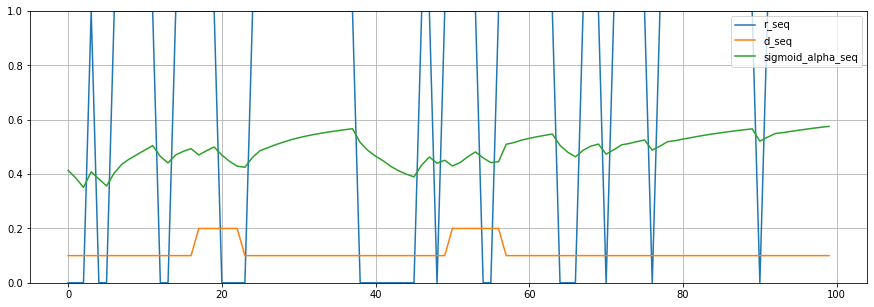

In [19]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[:100], label="r_seq")
plt.plot((d_seq[:100] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[:100], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

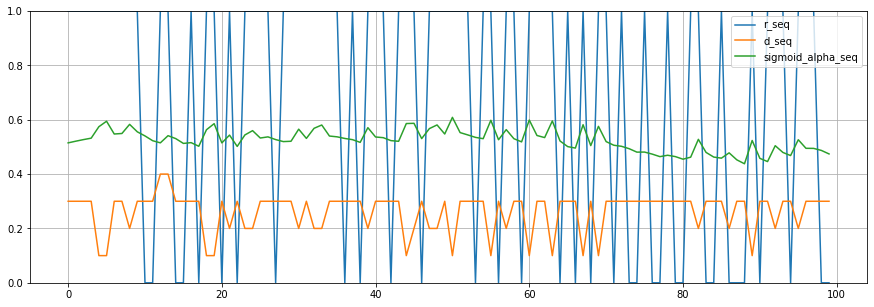

In [20]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[-100:], label="r_seq")
plt.plot((d_seq[-100:] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[-100:], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

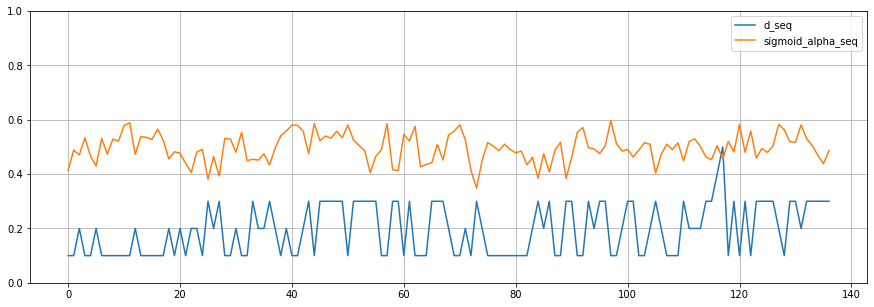

In [21]:
plt.figure(figsize=[15, 5], facecolor="white")
# plt.plot(r_seq[::10], label="r_seq")
plt.plot((d_seq[::10] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[::10], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

In [22]:
CQ_seq.shape, r_seq.shape

((1362, 37), (1362,))

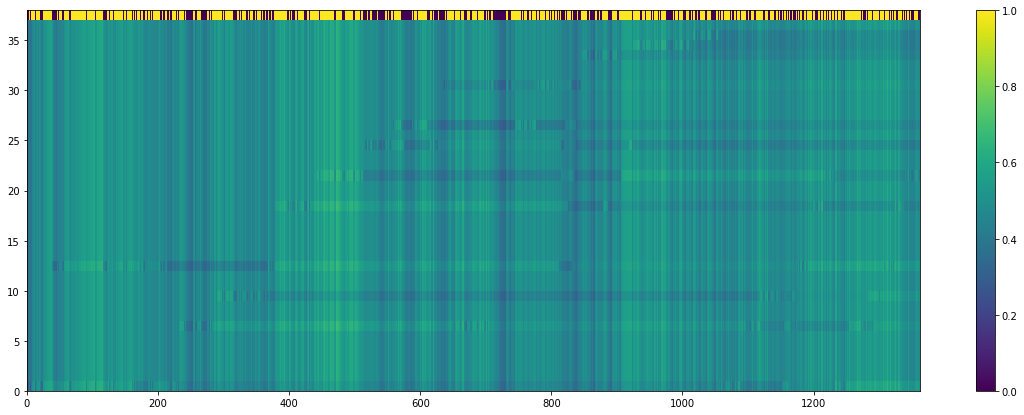

In [23]:
plt.figure(figsize=[20, 7], facecolor="white")
temp = np.concatenate([CQ_seq.T, [r_seq]], axis=0)
plt.pcolormesh(temp)
plt.colorbar()
plt.show()

# plt.figure(figsize=[15, 0.5], facecolor="white")
# plt.pcolormesh(r_seq)
# plt.show()

In [24]:
true_indices = \
    (dataset.c_list == "01 다항식의 연산") | \
    (dataset.c_list == "02 항등식과 나머지정리") | \
    (dataset.c_list == "03 인수분해") | \
    (dataset.c_list == "04 복소수") | \
    (dataset.c_list == "05 이차방정식") | \
    (dataset.c_list == "06 이차방정식과 이차함수") | \
    (dataset.c_list == "07 여러 가지 방정식") | \
    (dataset.c_list == "08 연립일차부등식") | \
    (dataset.c_list == "09 이차부등식과 연립이차부등식")

In [25]:
true_indices

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False])

In [26]:
CQ_seq[0][true_indices], CQ_seq[22][true_indices], CQ_seq[-1][true_indices], c_seq, d_seq

(array([0.3507404 , 0.41372472, 0.41372472, 0.41372472, 0.41372472,
        0.41372472, 0.41372472, 0.41372472, 0.41372472], dtype=float32),
 array([0.35489926, 0.42899424, 0.42899424, 0.42899424, 0.42899424,
        0.42899424, 0.42899424, 0.42899424, 0.42899424], dtype=float32),
 array([0.52260876, 0.4959795 , 0.50293505, 0.5224366 , 0.4360967 ,
        0.42133602, 0.4208339 , 0.4409219 , 0.4880473 ], dtype=float32),
 array([ 0,  0,  0, ..., 21, 21, 21]),
 array([0, 0, 0, ..., 2, 2, 2]))

In [27]:
dataset.c_list[true_indices]

array(['01 다항식의 연산', '02 항등식과 나머지정리', '03 인수분해', '04 복소수', '05 이차방정식',
       '06 이차방정식과 이차함수', '07 여러 가지 방정식', '08 연립일차부등식',
       '09 이차부등식과 연립이차부등식'], dtype=object)

In [28]:
sigmoid_alpha_seq[0], sigmoid_alpha_seq[22], sigmoid_alpha_seq[-1], c_seq, d_seq

(0.41372472,
 0.42899424,
 0.4741175,
 array([ 0,  0,  0, ..., 21, 21, 21]),
 array([0, 0, 0, ..., 2, 2, 2]))